In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import plotly.graph_objects as go


import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pmd


from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
df

In [2]:
def eval_metrics(y_true, y_pred):
    print(f'R2_score: {r2_score(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred, squared=True):.4f}')
    print(f'RMSE: {mean_squared_error(y_true, y_pred, squared=False):.4f}')    

In [3]:
df = pd.read_csv('data/train_algiers.csv')
df_population = pd.read_csv('data/Algiers-population-2023-11-22.csv')
df_population['date'] = pd.to_datetime(df_population['date'], format='%Y-%m-%d')
df_population['year'] = df_population['date'].dt.year

In [11]:
df_population

date   Population   Annual Change  year
0  1950-12-31       516000             NaN  1950
1  1951-12-31       534000            3.49  1951
2  1952-12-31       552000            3.37  1952
3  1953-12-31       570000            3.26  1953
4  1954-12-31       589000            3.33  1954
..        ...          ...             ...   ...
81 2031-12-31      3312000            1.50  2031
82 2032-12-31      3359000            1.42  2032
83 2033-12-31      3406000            1.40  2033
84 2034-12-31      3451000            1.32  2034
85 2035-12-31      3496000            1.30  2035

[86 rows x 4 columns]

In [4]:
df.index = pd.to_datetime(df.date)
df['population'] = [df_population[df_population['year'] == y][' Population'].values[0] for y in df.index.year]

In [5]:
# Set constants
water_supply= 490
# Set the total lake and reservoir area to lake_reservoir_area
total_dam_area = 75.63
# Water demand'
daily_water_demand_lcd = 200
# A day in second
day_in_sec = 86400

# Calculate daily water volume in liter
precipitation_mld = total_dam_area * df['precipitation_sum (mm)']
evapotranspiration_mld = total_dam_area * 10**6 * (df['Evap_tavg'] * day_in_sec * 10**(-6))
runoff_mld = total_dam_area * 10**6 * (df['Qs_tavg'] * day_in_sec * 10**(-6))
delta = precipitation_mld - evapotranspiration_mld - runoff_mld
daily_water_volume = water_supply + delta
daily_water_demand_mld = daily_water_demand_lcd * df['population'] * 10**(-6)
water_availability = daily_water_volume - daily_water_demand_mld

In [13]:
fig = go.Figure([go.Scatter(x=delta.index, y=delta)])
#fig.update_layout(title={'text': chart_names[i]})
fig.show()

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df

date  precipitation_sum (mm)  temperature_2m_above_ground  \
date                                                                          
2015-04-01  2015-04-01                     0.0                    11.984259   
2015-04-02  2015-04-02                     0.0                    12.426162   
2015-04-03  2015-04-03                     0.0                    13.183237   
2015-04-04  2015-04-04                     0.0                    12.117507   
2015-04-05  2015-04-05                     0.0                    11.775280   
...                ...                     ...                          ...   
2021-12-26  2021-12-26                     0.4                    16.287671   
2021-12-27  2021-12-27                     0.0                    15.364401   
2021-12-28  2021-12-28                     0.0                    15.230325   
2021-12-29  2021-12-29                     0.0                    15.254436   
2021-12-30  2021-12-30                     0.0                    14.979386   

            specific_humidity_2m_above_ground  \
date                                            
2015-04-01                           0.007020   
2015-04-02                           0.006639   
2015-04-03                           0.007103   
2015-04-04                           0.006628   
2015-04-05                           0.006604   
...                                       ...   
2021-12-26                           0.007353   
2021-12-27                           0.007059   
2021-12-28                           0.006617   
2021-12-29                           0.006148   
2021-12-30                           0.005950   

            relative_humidity_2m_above_ground  \
date                                            
2015-04-01                          79.653691   
2015-04-02                          73.369087   
2015-04-03                          73.648926   
2015-04-04                          74.249417   
2015-04-05                          75.414558   
...                                       ...   
2021-12-26                          64.745201   
2021-12-27                          65.617104   
2021-12-28                          62.344394   
2021-12-29                          58.465583   
2021-12-30                          57.813201   

            u_component_of_wind_10m_above_ground  \
date                                               
2015-04-01                             -1.008622   
2015-04-02                             -0.882894   
2015-04-03                             -0.554821   
2015-04-04                             -0.762048   
2015-04-05                             -1.970064   
...                                          ...   
2021-12-26                              1.852457   
2021-12-27                              1.496906   
2021-12-28                              0.348704   
2021-12-29                              0.088050   
2021-12-30                              0.323049   

            v_component_of_wind_10m_above_ground  \
date                                               
2015-04-01                             -1.247756   
2015-04-02                             -0.674852   
2015-04-03                             -0.975509   
2015-04-04                             -1.315288   
2015-04-05                             -1.730378   
...                                          ...   
2021-12-26                              0.836797   
2021-12-27                              0.156879   
2021-12-28                              0.345577   
2021-12-29                              0.232945   
2021-12-30                              0.204321   

            precipitable_water_entire_atmosphere  total_precipitation_surface  \
date                                                                            
2015-04-01                             11.792043                     0.000000   
2015-04-02                             10.580860                     0.000000   
2015-04-03                          

In [7]:
list_charts = [precipitation_mld, evapotranspiration_mld, runoff_mld]
chart_names = ['precipitation_mld', 'evapotranspiration_mld', 'runoff_mld']

In [8]:
for i, chart in enumerate(list_charts):
    fig = go.Figure([go.Scatter(x=chart.index, y=chart)])
    fig.update_layout(title={'text': chart_names[i]})
    fig.show()

In [14]:
fig = go.Figure([go.Scatter(x=df.index, y=df.water_availability)])
fig.update_layout(title={'text': 'Target'})
fig.show()

# Fuller test

In [15]:
def ad_fuller(timeseries):
    print ('Dickey-Fuller Test indicates:')
    df_test = adfuller(timeseries, regression='ct', autolag='AIC')
    output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(output)

print(ad_fuller(df['water_availability']))
#print(ad_fuller(df['water_availability'].diff().dropna()))

Dickey-Fuller Test indicates:
Test Statistic                   -5.973819
p-value                           0.000002
#Lags Used                       26.000000
Number of Observations Used    2423.000000
dtype: float64
None


# ACF/PACF

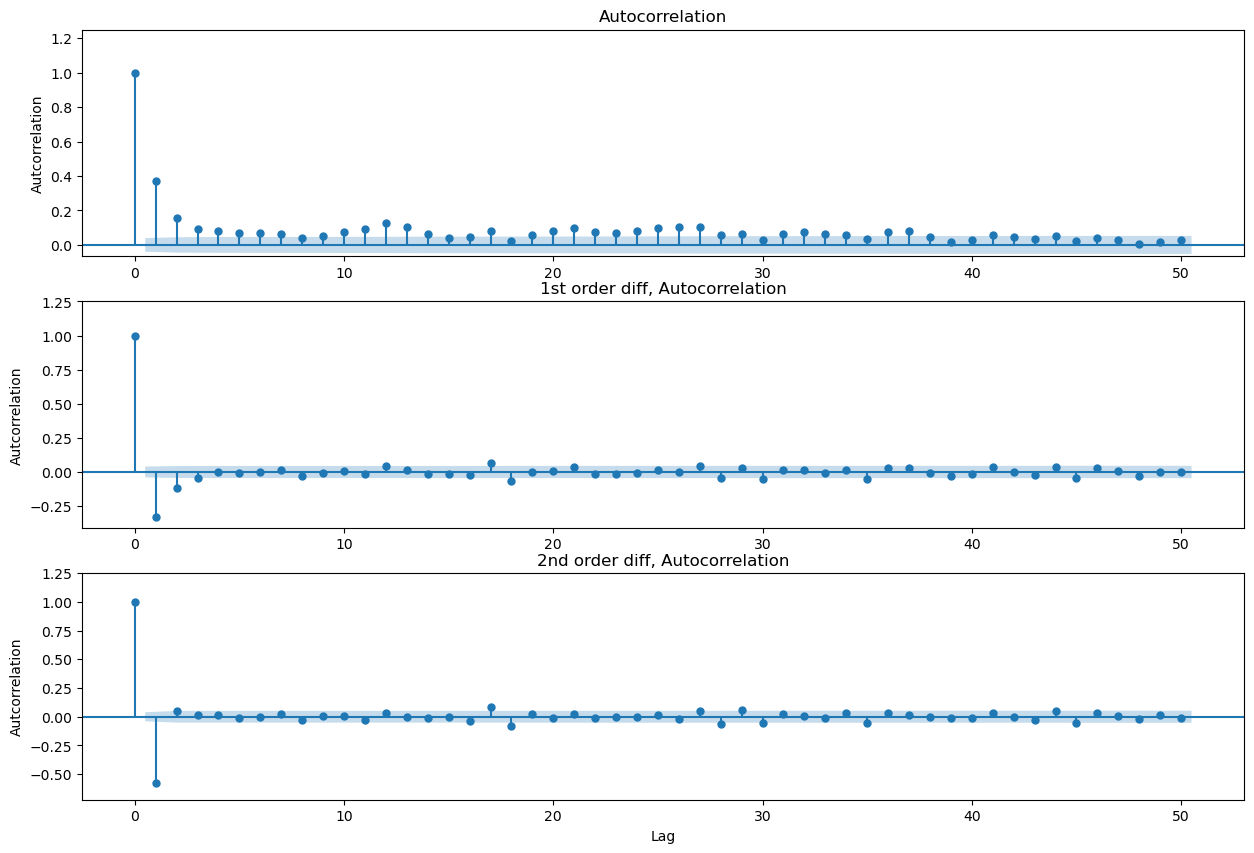

In [16]:
def acf_plot_diff(series):
    fig, ax = plt.subplots(3, figsize=(15,10))
    plot_acf(
        x=series,
        lags=50,
        ax=ax[0],
        alpha=0.05,
        auto_ylims=True,
    )
    plot_acf(
        x=series.diff().dropna(),
        lags=50,
        ax=ax[1],
        alpha=0.05,
        auto_ylims=True
    )
    plot_acf(
        x=series.diff().diff().dropna(),
        lags=50,
        ax=ax[2],
        alpha=0.05,
        auto_ylims=True
    )
    ax[0].set_title("Autocorrelation")
    ax[1].set_title("1st order diff, Autocorrelation")
    ax[2].set_title("2nd order diff, Autocorrelation")
    ax[0].set_ylabel("Autcorrelation")
    ax[1].set_ylabel("Autcorrelation")
    ax[2].set_ylabel("Autcorrelation")
    ax[2].set_xlabel("Lag")
    plt.show()
acf_plot_diff(df["water_availability"])

Note: In the last chart the series is overdifferenced. From these charts it's seen that d should be 0, because 1st order diff is negative, but I I want to compare results for d=0 and d=1. Based on this site (https://people.duke.edu/~rnau/411arim2.htm) the second diff is not overdifferenced.

In [ ]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_pacf(
    x=df["water_availability"],
    method='ywmle',
    lags=20,
    ax=ax,
    alpha=0.05,
    auto_ylims=True
)
ax.set_xlabel("lag")
plt.tight_layout()

Note: AR=1 (plot has a significant spike only at lag 1 abd it's positive)

# Plotly charts

In [17]:
def create_corr_plot(series, plot_pacf=False):
    corr_array = sm.tsa.pacf(series.dropna(), alpha=0.05) if plot_pacf else sm.tsa.acf(series.dropna(), alpha=0.05)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines',fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title='Partial Autocorrelation (PACF)' if plot_pacf else 'Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.show()

In [18]:
def create_acf_pacf(series):
    create_corr_plot(series)
    create_corr_plot(series,plot_pacf=True)

In [19]:
create_acf_pacf(df["water_availability"])

In [20]:
df['water_availability'].diff().dropna()

date
2015-04-02    27.112165
2015-04-03    -2.626706
2015-04-04    11.400280
2015-04-05   -21.795836
2015-04-06    55.874262
                ...    
2021-12-26    35.635101
2021-12-27   -21.092050
2021-12-28    11.982811
2021-12-29     8.927536
2021-12-30    11.686188
Name: water_availability, Length: 2449, dtype: float64

In [21]:
def ad_fuller(timeseries):
    print ('Dickey-Fuller Test indicates:')
    df_test = adfuller(timeseries, regression='ct', autolag='AIC')
    output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(output)

print(ad_fuller(df['water_availability']))
#print(ad_fuller(df['water_availability'].diff().dropna()))

Dickey-Fuller Test indicates:
Test Statistic                   -5.973819
p-value                           0.000002
#Lags Used                       26.000000
Number of Observations Used    2423.000000
dtype: float64
None


# Arima model

In [22]:
# ARIMA, d=0
model_d0 = pmd.auto_arima(df["water_availability"],start_p=1,start_q=1,test='adf',d=0,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=34206.693, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=34568.625, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=34205.843, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=34258.299, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=34669.961, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=34206.771, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=34208.569, Time=0.95 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=34249.855, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.284 seconds


In [23]:
# ARIMA, d=0
model_d1 = pmd.auto_arima(df["water_availability"],start_p=1,start_q=1,test='adf',d=1,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=34170.357, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=35113.533, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34836.224, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34397.503, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=35111.533, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=34171.456, Time=1.74 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=34171.503, Time=1.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=34184.790, Time=1.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=34672.076, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=34172.175, Time=3.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=34168.394, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=34395.511, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=34834.224, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=34169.492, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
arima_d0=ARIMA(df["water_availability"],order=(1,0,0))
model_d0 = arima_d0.fit()

arima_d1=ARIMA(df["water_availability"],order=(1,1,0))
model_d1 = arima_d1.fit()

In [ ]:
pred_d0 = model_d0.predict(start=df.index[-1] + pd.DateOffset(-300), end=df.index[-1])
pred_d1 = model_d1.predict(start=df.index[-1] + pd.DateOffset(-300), end=df.index[-1])

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
df[-300:].water_availability.plot(ax=ax, label='true', color='blue')
pred_d0.plot(ax=ax, label='in-sample forecast (d0)', color='red')
pred_d1.plot(ax=ax, label='in-sample forecast (d0)', color='green')


ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.title('ARIMA, in-sample forecast')
plt.legend()
plt.show()

In [16]:
fig = go.Figure([go.Scatter(x=df.index[-300:], y=df["water_availability"][-300:], name='real'), 
                 go.Scatter(x=pred_d0.index, y=pred_d0, name='in-sample forecast, d=0'), 
                 go.Scatter(x=pred_d1.index, y=pred_d1, name='in-sample forecast, d=1')]
               )
fig.update_layout(title={'text': 'ARIMA, in-sample forecast'})
fig.write_html("plotly_charts/arima_in_sample_forecasting.html")
fig.show()

# Test data

In [17]:
df_test = pd.read_csv('data/test_algiers.csv')

In [18]:
df_test.head()

date  precipitation_sum (mm)  temperature_2m_above_ground  \
0  2022-01-01                     0.0                    14.362410   
1  2022-01-02                     0.0                    13.754120   
2  2022-01-03                     0.0                    13.007181   
3  2022-01-04                     0.0                    12.400852   
4  2022-01-05                     0.4                    11.651835   

   specific_humidity_2m_above_ground  relative_humidity_2m_above_ground  \
0                           0.005930                          59.793684   
1                           0.005732                          59.988725   
2                           0.005865                          64.340447   
3                           0.005519                          62.652419   
4                           0.005592                          65.912025   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                              0.649728                             -0.129626   
1                              1.456428                             -0.439457   
2                              1.428484                             -0.409314   
3                              2.115176                             -0.380763   
4                              1.913405                             -0.568244   

   precipitable_water_entire_atmosphere  total_precipitation_surface  \
0                             11.859802                     0.450822   
1                             11.737146                     0.411741   
2                             13.172519                     0.663236   
3                             12.382598                     0.260890   
4                             13.392617                     0.313993   

   ACond_tavg  ...  SnowDepth_tavg  SnowT_tavg  SoilMoist_P_tavg  \
0    0.009450  ...             0.0  286.788900        899.052530   
1    0.008960  ...             0.0  286.541410        898.045329   
2    0.008998  ...             0.0  286.935664        897.024039   
3    0.017794  ...             0.0  287.612572        895.738426   
4    0.065906  ...             0.0  286.317625        894.526057   

   SoilMoist_RZ_tavg  SoilMoist_S_tavg  SWE_tavg  Swnet_tavg  TVeg_tavg  \
0         228.701979          4.636154       0.0   93.006431   0.000002   
1         228.424234          4.628034       0.0   95.277539   0.000002   
2         228.134524          4.619723       0.0   95.147285   0.000002   
3         227.580171          4.549587       0.0  101.400477   0.000004   
4         227.139445          4.626612       0.0   71.475149   0.000001   

     TWS_tavg  water_availability  
0  899.053248         -132.530627  
1  898.046216         -134.054294  
2  897.025475         -137.813533  
3  895.739475         -184.837768  
4  894.539133         -183.853833  

[5 rows x 33 columns]

In [19]:
df_test.index = pd.to_datetime(df_test.date)
history = [x for x in df.water_availability]
test = df_test.water_availability

In [20]:
df.index.min(), df.index.max()

(Timestamp('2015-04-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

In [21]:
test.index.min(), test.index.max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2023-06-30 00:00:00'))

# Recursive 1-step-forward forecasting

In [22]:
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
model_fit.forecast()

array([-134.25042161])

In [23]:
#Training the model again after each prediction, making one-step-ahead prediction each time
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    one_step_ahead = model_fit.forecast()
    yhat = one_step_ahead[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

C:\Users\Me\AppData\Local\Temp\ipykernel_12408\387694620.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [24]:
pred_series = pd.Series(predictions)
pred_series.index = df_test.index

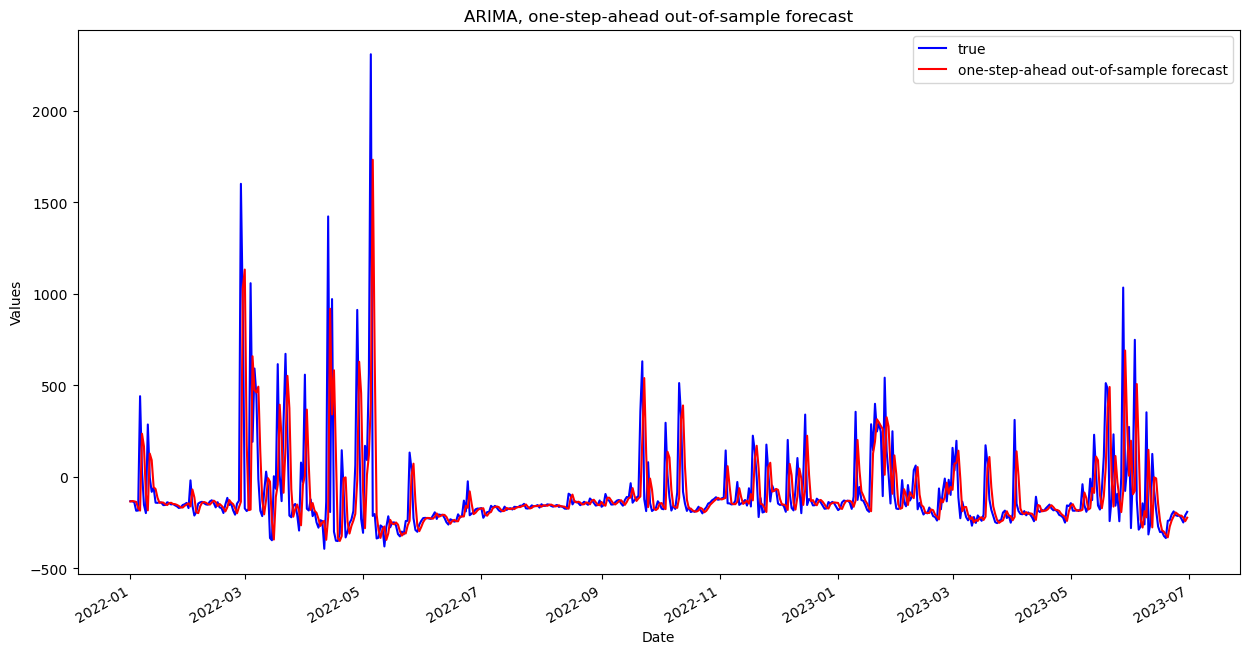

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
df_test.water_availability.plot(ax=ax, label='true', color='b')
pred_series.plot(ax=ax, label='one-step-ahead out-of-sample forecast', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.title('ARIMA, one-step-ahead out-of-sample forecast')
plt.legend()
plt.show()

In [26]:
fig = go.Figure([go.Scatter(x=df_test.index, y=df_test.water_availability, name='true'), go.Scatter(x=pred_series.index, y=pred_series, name='one-step-ahead out-of-sample forecast')])
fig.update_layout(title={'text': 'ARIMA, one-step-ahead out-of-sample forecast'})
fig.write_html("plotly_charts/arima_out_of_sample_forecasting_1_step_ahead.html")
fig.show()

In [27]:
eval_metrics(df_test.water_availability, predictions)

R2_score: -0.2087
MSE: 70152.3638
RMSE: 264.8629


# Multi-Step Forecasting

In [28]:
pred_multi = model_fit.forecast(len(df_test))

In [29]:
pred_multi_series = pd.Series(pred_multi)
pred_multi_series.index = df_test.index

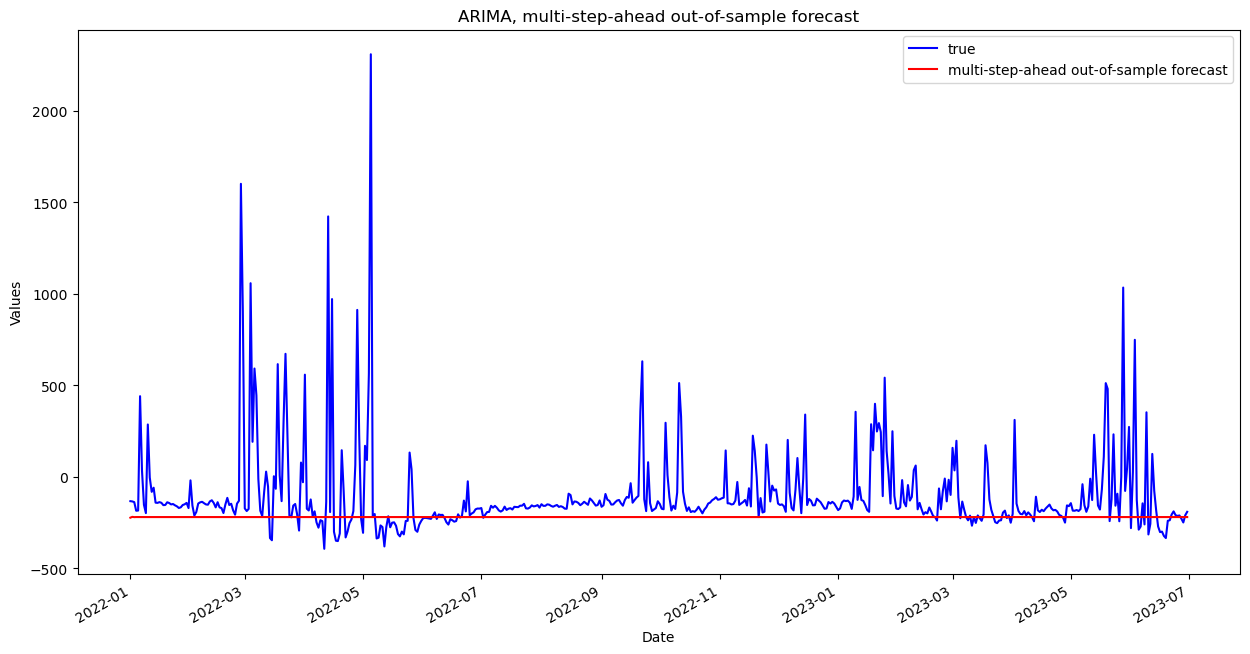

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
df_test.water_availability.plot(ax=ax, label='true', color='b')
pred_multi_series.plot(ax=ax, label='multi-step-ahead out-of-sample forecast', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.title('ARIMA, multi-step-ahead out-of-sample forecast')
plt.legend()
plt.show()

In [31]:
fig = go.Figure([go.Scatter(x=df_test.index, y=df_test.water_availability, name='true'), go.Scatter(x=pred_multi_series.index, y=pred_multi_series, name='forecast')])
fig.update_layout(title={'text': 'ARIMA, multi-step-ahead forecast'})
fig.write_html("plotly_charts/arima_out_of_sample_forecasting_multi_step_ahead.html")
fig.show()

In [32]:
eval_metrics(df_test.water_availability, pred_multi_series)

R2_score: -0.2495
MSE: 72521.2385
RMSE: 269.2977


# Monthly data

In [24]:
df['year'] = df.index.year
df['month'] = df.index.month

In [25]:
# month agg
df_month_agg = df.groupby(['year', 'month'])['water_availability'].median().reset_index()
df_month_agg['date_ym'] = df_month_agg['year'].astype(str) + '-' + df_month_agg['month'].astype(str)
df_month_agg.index = pd.to_datetime(df_month_agg['date_ym'])
df_month_agg.resample('M').last()

year  month  water_availability  date_ym
date_ym                                             
2015-04-30  2015      4         -161.163692   2015-4
2015-05-31  2015      5         -138.095198   2015-5
2015-06-30  2015      6         -149.565194   2015-6
2015-07-31  2015      7         -113.915931   2015-7
2015-08-31  2015      8         -105.882649   2015-8
...          ...    ...                 ...      ...
2021-08-31  2021      8         -131.063877   2021-8
2021-09-30  2021      9         -132.398155   2021-9
2021-10-31  2021     10         -123.855897  2021-10
2021-11-30  2021     11          -40.780862  2021-11
2021-12-31  2021     12         -144.966748  2021-12

[81 rows x 4 columns]

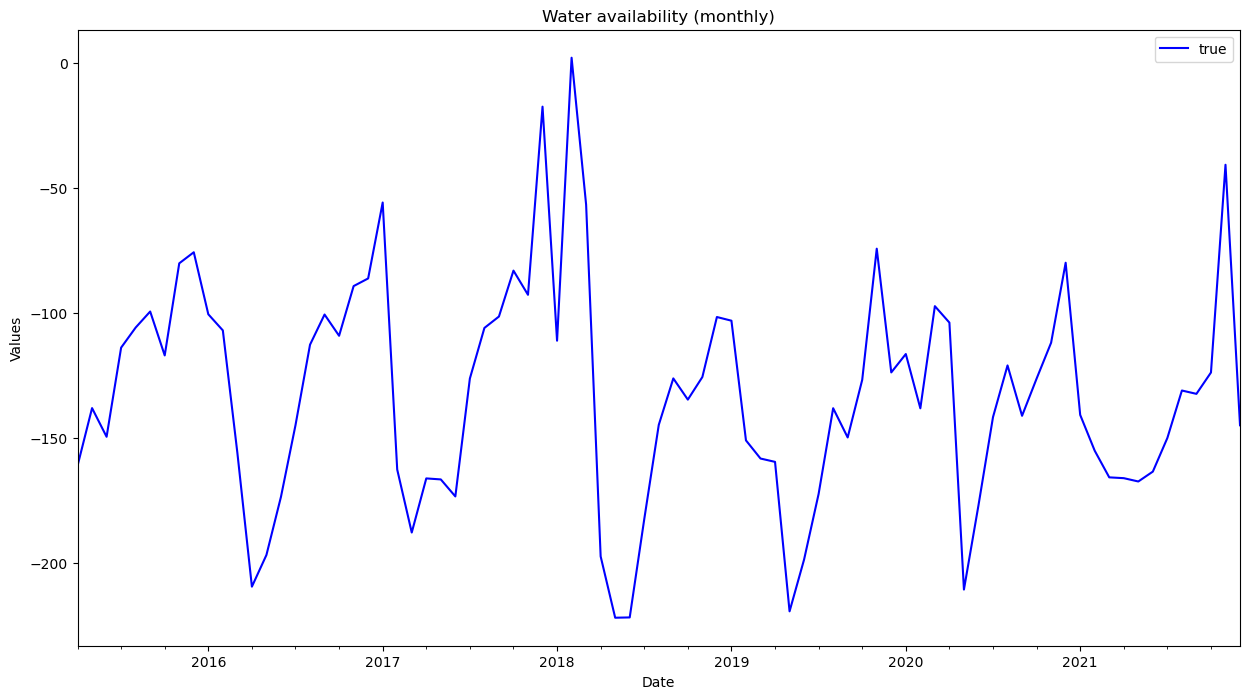

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
df_month_agg.water_availability.plot(ax=ax, label='true', color='b')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.title('Water availability (monthly)')
plt.legend()
plt.show()

In [27]:
fig = go.Figure([go.Scatter(x=df_month_agg.index, y=df_month_agg.water_availability)])
fig.update_layout(title={'text': 'Water availability (monthly)'})
fig.write_html("plotly_charts/water_availability_monthly_madian_agg.html")
fig.show()

In [37]:
print(ad_fuller(df_month_agg.water_availability))

NameError: name 'ad_fuller' is not defined

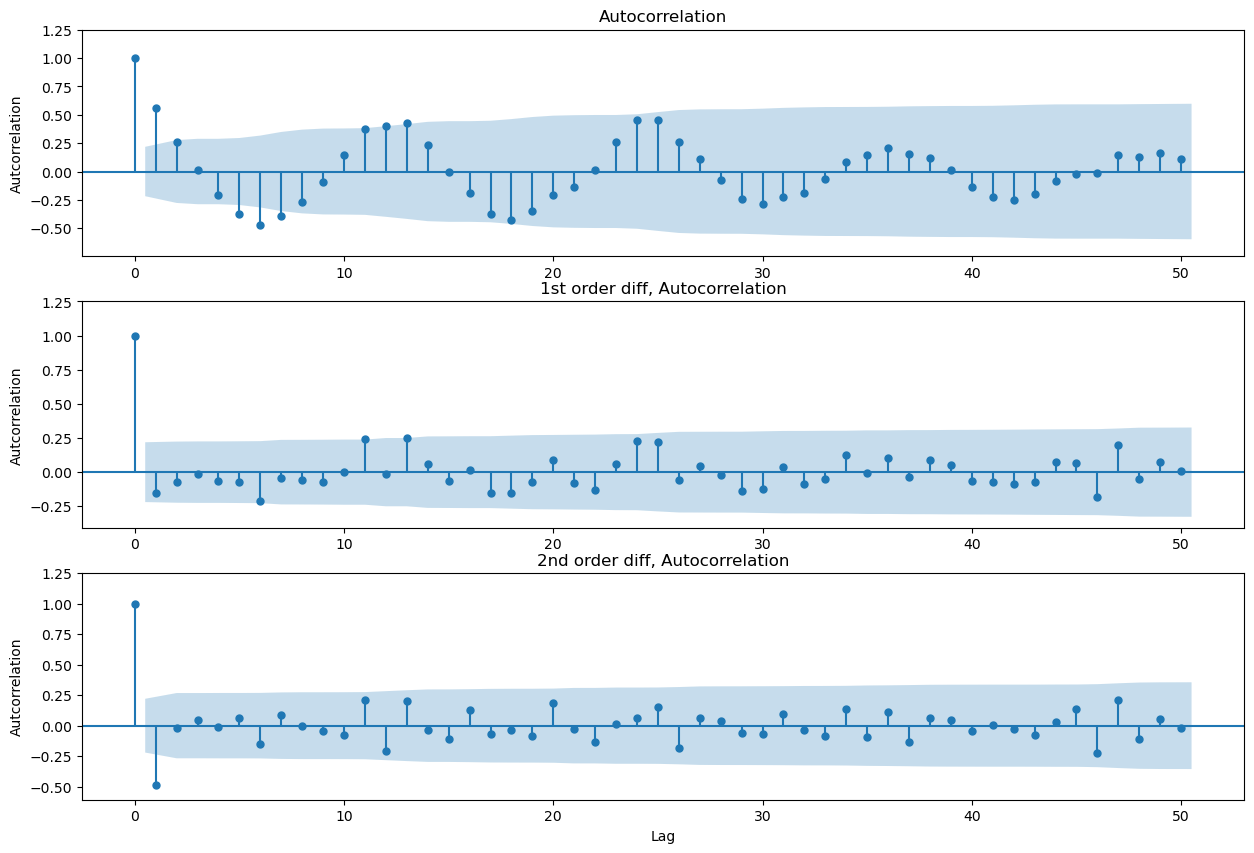

In [38]:
acf_plot_diff(df_month_agg["water_availability"])

In [ ]:
# d=0 

In [45]:
create_acf_pacf(df_month_agg["water_availability"])

In [46]:
model=pmd.auto_arima(df_month_agg["water_availability"],start_p=1,start_q=1,test='adf',d=0, m=12, seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=820.626, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=847.683, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=820.491, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=824.931, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1031.780, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=819.739, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=821.038, Time=0.15 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=815.629, Time=0.32 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=813.467, Time=0.55 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=812.270, Time=0.46 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=821.993, Time=0.43 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=813.795, Time=0.56 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=815.295, Time=0.46 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept  

In [49]:
model =SARIMAX(df_month_agg["water_availability"],
                         order=(2, 0, 0),
                         seasonal_order=(1, 0, 0, 12))
result = model.fit()
print(result.summary())

C:\Users\Me\anaconda3\envs\ts\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Me\anaconda3\envs\ts\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                     SARIMAX Results                                      
Dep. Variable:                 water_availability   No. Observations:                   81
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -410.049
Date:                            Tue, 23 Jan 2024   AIC                            830.098
Time:                                    17:02:59   BIC                            842.070
Sample:                                04-01-2015   HQIC                           834.901
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5639      0.096      5.898      0.000       0.376       0.751
ar.L2          0.3405      0.078   

In [50]:
# In-sample one-step-ahead predictions
predict = result.get_prediction()
predict_ci = predict.conf_int()
predicted_mean = predict.predicted_mean

In [51]:
predicted_mean = predict.predicted_mean

In [52]:
def pred_fill_between_chart(predict_df, pred_mean, true_series):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=predict_df.index, 
                             y=predict_df.iloc[:,1],
                             fill=None,
                             mode='lines',
                             line_color='#CCB8D7',
                             name='upper border'
                            )
                 )
    fig.add_trace(go.Scatter(x=predict_df.index,
                             y=predict_df.iloc[:,0],
                             fill='tonexty', # fill area between trace0 and trace1
                             mode='lines', 
                             line_color='#CCB8D7',
                             name='lower border'
                            )
                 )
    fig.add_trace(go.Scatter(x=pred_mean.index, 
                             y=pred_mean,
                             mode='lines+markers',
                             name='predicted mean',
                             line=dict(color='#3831B7', width=4, dash='dot')
                            )
                 )
    fig.add_trace(go.Scatter(x=true_series.index, 
                             y=true_series,
                             mode='lines+markers',
                             name='observed',
                             line_color='#E61937'))
    return fig 

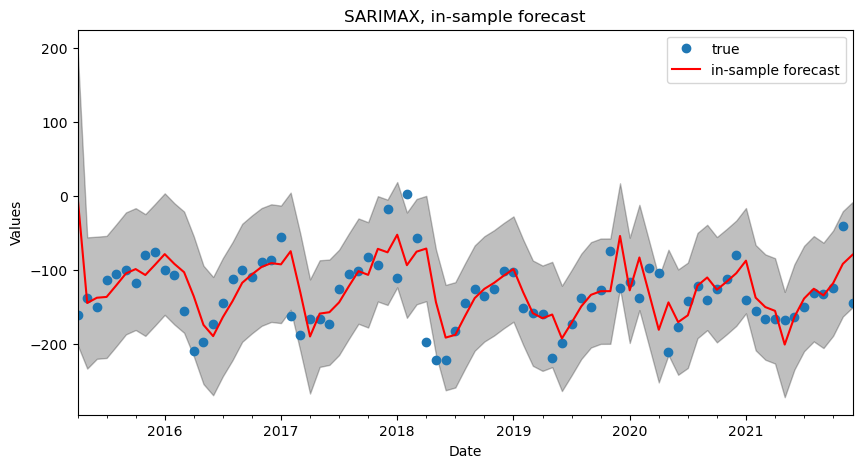

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
df_month_agg.water_availability.plot(ax=ax, style='o', label='true')
predicted_mean.plot(ax=ax, label='in-sample forecast', color='r')
ax.fill_between(predict_ci.index,
                predict_ci.iloc[:, 0],
                predict_ci.iloc[:, 1], 
                color='k', 
                alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.title('SARIMAX, in-sample forecast')
plt.show()

In [54]:
fig = pred_fill_between_chart(predict_ci, predicted_mean, df_month_agg.water_availability)
fig.update_layout(title={'text': 'SARIMAX, in-sample forecasting'})    
fig.write_html("plotly_charts/sarimax_in_sample_forecasting.html")
fig.show()

In [55]:
eval_metrics(df_month_agg.water_availability, predicted_mean)    

R2_score: 0.1465
MSE: 1668.2158
RMSE: 40.8438


# Test data set, out-of-sample forecasting

In [56]:
# preprocess test data
df_test = pd.read_csv('data/test_algiers.csv')
df_test.index = pd.to_datetime(df_test.date)
df_test['year'] = df_test.index.year
df_test['month'] = df_test.index.month
df_test_month_agg = df_test.groupby(['year', 'month'])['water_availability'].median().reset_index()
df_test_month_agg['date_ym'] = df_test_month_agg['year'].astype(str) + '-' + df_test_month_agg['month'].astype(str)
df_test_month_agg.index = pd.to_datetime(df_test_month_agg['date_ym'])
df_test_month_agg.resample('M').last()
df_test_month_agg.index.min(), df_test_month_agg.index.max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2023-06-01 00:00:00'))

In [57]:
pred_intervals = result.get_forecast(steps=len(df_test_month_agg)).conf_int()
pred_intervals_mean = result.forecast(steps=len(df_test_month_agg))

NameError: name 'df_test_month_agg' is not defined

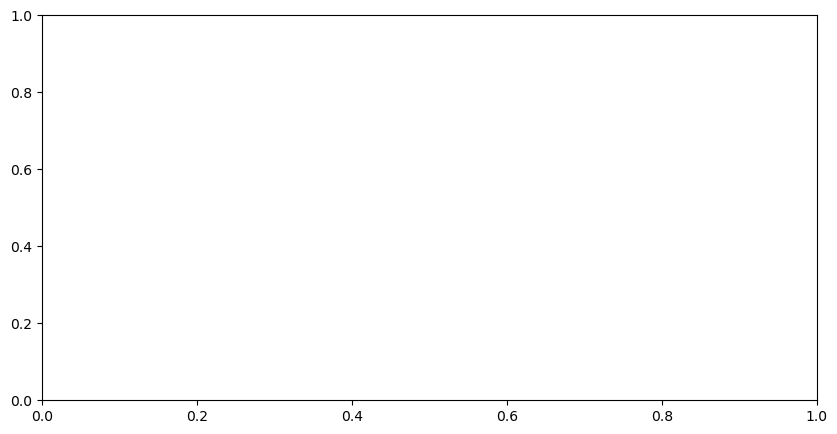

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
df_test_month_agg.water_availability.plot(ax=ax, style='o', label='true')
pred_intervals_mean.plot(ax=ax, label='multi-step-ahead out-of-sample forecast', color='r')
ax.fill_between(pred_intervals.index,
                pred_intervals.iloc[:, 0],
                pred_intervals.iloc[:, 1], 
                color='k', 
                alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

In [59]:
fig = pred_fill_between_chart(pred_intervals, pred_intervals_mean, df_test_month_agg.water_availability)
fig.update_layout(title={'text': 'SARIMAX, out-of-sample multi-step-ahead predictions'})    
fig.write_html("plotly_charts/sarimax_out_of_sample_forecasting_multi_step_ahead.html")
fig.show()

In [60]:
eval_metrics(df_test_month_agg.water_availability, pred_intervals_mean)

R2_score: -1.0626
MSE: 4170.6575
RMSE: 64.5806


In [ ]:
R2_score: 0.1465
MSE: 1668.2158
RMSE: 40.8438

# Forecasting for next 5 years

In [61]:
num_years = 5
pred_intervals = result.get_forecast(steps=len(df_test_month_agg)+num_years*12).conf_int()
pred_intervals_mean = result.forecast(steps=len(df_test_month_agg)+num_years*12)

In [62]:
pred_intervals_mean

2022-01-01   -113.169536
2022-02-01   -133.637442
2022-03-01   -108.654160
2022-04-01   -110.336718
2022-05-01   -156.221463
                 ...    
2028-02-01    -27.600702
2028-03-01    -24.667051
2028-04-01    -24.553984
2028-05-01    -29.845772
2028-06-01    -27.175984
Freq: MS, Name: predicted_mean, Length: 78, dtype: float64

In [63]:
fig = pred_fill_between_chart(pred_intervals, pred_intervals_mean, df_test_month_agg.water_availability)
fig.update_layout(title={'text': 'SARIMAX, 5 years forecasting'})    
fig.write_html("plotly_charts/sarimax_out_of_sample_5_years.html")
fig.show()